## 21.1 Binary Trees   

Binary Trees consist of nodes which have **at most** two children.

**Terminology:**

*Nodes*
- **Root**: The top node.
- **Leaf**: Node w/o children.
- **Internal Node**: A node w/a.l one child. (Including root)
- **Parent**: The directly connects to the child node.
- **Ancestor**: All the nodes preceeding the child. Succession chain.
- **Edge**: Links two nodes.
- **Depth**: # of edges that must be crossed to get from root to a lower node. (Root is at 0 depth)
- **Level**: The depth at which nodes sit.
- **Height**: The maximum depth of the tree. (A tree with one node is 0 height)

*Structure*
- **Full**: Every node contains two or zero children.
- **Complete**: All levels are filled in except possibly the last level. Filled in left to right order.
- **Perfect**: All leafs are at the same level and all nodes above the last level (leaf leve) have two children.


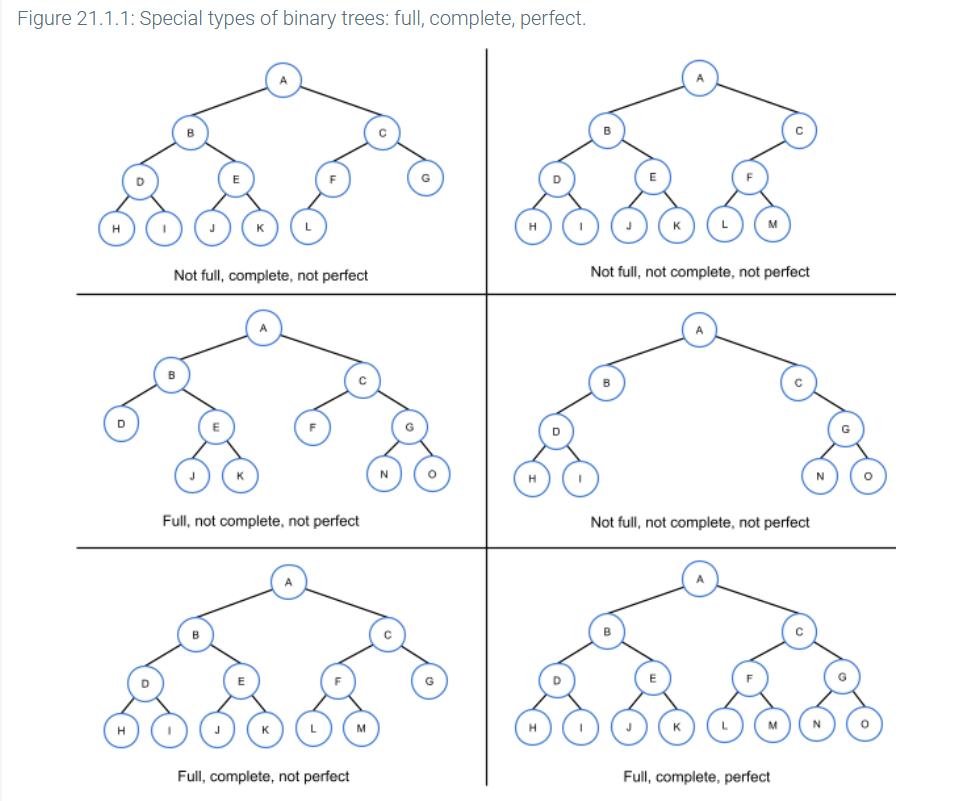
><caption>[1] Ch 21.1 Binary Trees, Figure 21.1.1</caption>

### 21.2 Applications of Trees (Brief)
Trees can be used to represent files and directories inside a file system. \
They can also be used to partition regions using a Space Partitioning Tree such as BSP or k-d Tree.
In general Trees serve as a store of values which can be structured to allow for fast operations on these values in terms of manipulating and changing these elements.



### 21.3 Binary Search Trees
A special type of Binary Tree in which the order of elements has importance.\
The elements are keys which we can use to establish order that satisfies the importance property.

The values of the nodes have the property such that:
$$left\_node\_subtrees\, \leq \, parent \, \leq \, right\_node\_subtrees$$

#### Searching
BST search can be faster than List search.

There is a simple algorithm to traverse the tree, looking for values.


```python
    if currentNode.key == desiredKey:
        return currentNode
    elif currentNode.key > desiredKey:
        #visit left child
    elif currentNode.key < desiredKey:
        #visit right child
```

From this algorithm we can deduce what kind of concepts are required.
- Recursion
- Loops
- Key/Value systems (if we need the nodes to represent more than just values like *priority : object*)

To construct the tree we'll need to make use of sorting algorithms. That way we can take a flat representation (list) and use it to construct the tree. 

#### Complexity
The number of comparisons required for a non-perfect tree is $H+1$.\
The height of a tree can be minimized by filling all levels, except possitbly the last level, and the minimized height can be computer by the follwowing function:
$$H = \lfloor log_2N\rfloor$$
Where N is the number of nodes.

The most comparisons required for this tree is $\lfloor log_2N\rfloor\,+\,1$\
Applies to perfect tree as well.


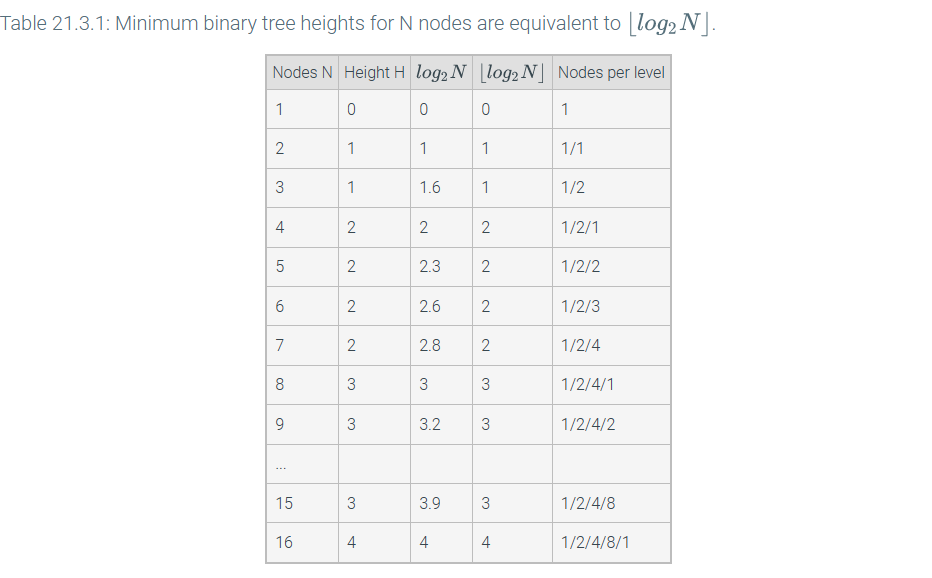
><caption>[1] Ch 21.3 Binary Search Trees, Table 21.3.1</caption>

#### Successors and Predecessors

With the ordering property we can define successors and predecessors.

If the BST is flattened then we naturally get a linked list in which keys have successors and predecessors.

| ![btree-svg](.\resources\binary-tree-traversal.drawio.svg)| ![btree-flat-svg](.\resources\binary-tree-flat.drawio.svg) |
|:-:|:-:|


Naturally, the lowest key has no predecessor and the highest has no successor.
They can be determined by looking at the **internal nodes**.

### 21.4 BST Search Algorithm

To search through the tree we need some way to move down the tree. This is as simple as using a loop to move left or right, starting with the root, untill a key is found or a leaf with no children is reached. There is an implicit check for children: if we move left or right and the child is not null, then keep checking. If the child is null then we're done and we return null. In python we could check for None and return None in the null case. 

If the desired key is selected then the algorithm immediately returns.

To build this in python we'll make use of classes. We need to construct a Node class that stores a key and contains references to its predecessor and its left and right children.

> Handy BST Visualization
>> https://www.cs.usfca.edu/~galles/visualization/BST.html




### **Before starting, there are a few things that need to be detailed about BSTs.**

### 21.5 BST Insert

We have to have a method of inserting nodes into the tree. The `insert` method will place nodes either to the left or right so it must check if the key of a node being visited is less than the key of what is being inserted. It must also recognize if there is a root value. If there is no root then the key is assigned as a root. 

For convenienience, a `buildTree` method is defined. This helps create a tree during instantiation of the `BST class`. It makes use of `insert` calls inside a loop.\
The runtime complexity of `insert` is $$\text{Best Case: }\,\Omega(logN) \\ \text{Worst Case: } O(N)$$

#### Implementation

How does the implementation `insert()` work inside the `BST` class? \
It first does a check on the `rootNode` to make sure a node is assigned to it. \
The following `else` branch begins scanning through the tree to make an insertion using a cursor `currentNode`.\
It does so by checking the left and right branches based on the value's magnitude compared to the `rootNode`\
If a place is found, the node is inserted and the cursor `currentNode` is nulled.

If a place is not found within a given loop, the algorithm will progress deeper into the tree untill it finds a place for the node.


### 21.6 BST Remove

The remove operation eliminates the first matching key and restructures the BST to preserve ordering.\
There are three cases to consider when performing a removal:
- Leaf Node: 
    - If X has parent Y then X is nulled by setting the side X is on (`Y.left` or `Y.right`) to null. 
    - If X is the root, then it is nulled resulting in an empty BST.
- Internal w/ 1 child:
    - If X has parent Y then the pointer to X is assigned X's child.
    - If X is the root, the root is assigned X's child.
- Internal w/ 2 children:
    - Locate X's successor (leftmost child of X's right subtree). Copy successor to X. Recursively remove successor from right subtree (remove the duplicate).


Removing a node from a nearly full BST has $O(logN)$ complexity.

```DSL
BSTRemove(tree, key) {
   par = null
   cur = tree⇢root
   while (cur is not null) { // Search for node
      if (cur⇢key == key) { // Node found 
         if (cur⇢left is null && cur⇢right is null) { // Remove leaf
            if (par is null) // Node is root
               tree⇢root = null
            else if (par⇢left == cur) 
               par⇢left = null
            else
               par⇢right = null
         }
         else if (cur⇢right is null) {                // Remove node with only left child
            if (par is null) // Node is root
               tree⇢root = cur⇢left
            else if (par⇢left == cur) 
               par⇢left = cur⇢left
            else
               par⇢right = cur⇢left
         }
         else if (cur⇢left is null) {                // Remove node with only right child
            if (par is null) // Node is root
               tree⇢root = cur⇢right
            else if (par⇢left == cur) 
               par⇢left = cur⇢right
            else
               par⇢right = cur⇢right
         }
         else {                                      // Remove node with two children
            // Find successor (leftmost child of right subtree)
            suc = cur⇢right
            while (suc⇢left is not null)
               suc = suc⇢left
            successorData = Create copy of suc's data
            BSTRemove(tree, suc⇢key)     // Remove successor
            Assign cur's data with successorData
         }
         return // Node found and removed
      }
      else if (cur⇢key < key) { // Search right
         par = cur
         cur = cur⇢right
      }
      else {                     // Search left
         par = cur
         cur = cur⇢left
      }
   }
   return // Node not found
}
```

### 21.7 BST In-Order Traversal

This type of traversal visits all nodes in a tree, smallest to largest. Great for printing BST's to text or creating a list in sorted order. 

```python
def BSTPrintInorder(node)
    if node is null
        return
    BSTPrintInorder(node->left)
    print (node)
    BSTPrintInorder(node->right)
```
> [1] Ch21.7: BST inorder traversal. Figure 21.7.1

This is a recursive function that will *visit each subtree, starting with root*.

### 21.8 Height & Insertion Order

Review:
- Height is the max # of edges from root to any leaf.
- Min height of N-node Bin Tree is $h = \lfloor{log_2N}\rfloor$
- Max height of N-node Bin Treee is $N-1$

Inserting items in random order keeps the BST's height as small as possible, but inserting in a sorted order yields close to maximum height (not so great).

Since the goal is to minimize the height, it's a good idea to **randomize** the list before inserting them into a BST.
- Time Complexity: $O(N)$
-- It is linear complexity because `BSTGetHeight()` **must be called for every node** in the tree.
#### Computing Height

We can recursively find height. By exploring each branch we eventually end up finding the height of the tree.
```python

def BSTGetHeight(node=self.rootNode):
    if node is None:
        return -1
    else:
        lh = BSTGetHeight(node.left)
        rh = BSTGetHeight(node.right)
        return 1 + max(lh, rh)
```

>[1] 21.8.3 Pseudocode


### 21.9 BST Parent Node Pointers

BST implementations usually include a parent pointer inside of each node.\
Balanced BSTs like *AVL Trees* or *Red-Black Trees* utilize the parent pointer to traverse the tree to find ancestors and siblings. 

The following blocks are implementations for BST functions that take advantage of the parent pointer.


#### BST Insert
---

BST Insert **will work in all cases**, even when `root` is `null`


```c
BSTInsert(tree, node) {
   if (tree⇢root == null) {
      tree⇢root = node
      node⇢parent = null
      return
   }

   cur = tree⇢root
   while (cur != null) {
      if (node⇢key < cur⇢key) {
         if (cur⇢left == null) {
            cur⇢left = node
            node⇢parent = cur
            cur = null
         }
         else
            cur = cur⇢left
      }
      else {
         if (cur⇢right == null) {
            cur⇢right = node
            node⇢parent = cur
            cur = null
         }
         else
            cur = cur⇢right
      }
   }
}
```

>[1] Figure 21.9.1: BSTInsert algorithm for BSTs with nodes containing parent pointers.

#### BST Replace Child
---

 - This function **will not work** if the `parent` is `null`


```c
BSTReplaceChild(parent, currentChild, newChild) {
if (parent⇢left != currentChild &&
    parent⇢right != currentChild)
    return false

if (parent⇢left == currentChild)
    parent⇢left = newChild
else
    parent⇢right = newChild

if (newChild != null)
    newChild⇢parent = parent
return true
}
```
>[1] Figure 21.9.2: BSTReplaceChild algorithm.

#### BST Remove
---

- BST Remove Key 
    - Will work if `key` is not in tree.
- BST Remove Node 
    - Will work even if it's the last remaining `node`.
    - It may be **recursive**.
    - It can be assumed that everything will be updated propertly (assuming you follow the specification)
    - Any calls to remove non-root node will call `BSTReplaceChild`.




```c
BSTRemoveKey(tree, key) {
   node = BSTSearch(tree, key)
   BSTRemoveNode(tree, node)
}

BSTRemoveNode(tree, node) {
   if (node == null)
      return

   // Case 1: Internal node with 2 children
   if (node⇢left != null && node⇢right != null) {
      // Find successor
      succNode = node⇢right
      while (succNode⇢left)
         succNode = succNode⇢left
            
      // Copy value/data from succNode to node
      node = Copy succNode
            
      // Recursively remove succNode
      BSTRemoveNode(tree, succNode)
   }

   // Case 2: Root node (with 1 or 0 children)
   else if (node == tree⇢root) {
      if (node⇢left != null)
         tree⇢root = node⇢left
      else
         tree⇢root = node⇢right
            
      // Make sure the new root, if non-null, has a null parent
      if (tree⇢root != null)
         tree⇢root⇢parent = null
   }

   // Case 3: Internal with left child only
   else if (node⇢left != null)
      BSTReplaceChild(node⇢parent, node, node⇢left)
   
   // Case 4: Internal with right child only OR leaf
   else
      BSTReplaceChild(node⇢parent, node, node⇢right)
}
```

>[1] Figure 21.9.3: BSTRemoveKey and BSTRemoveNode algorithms for BSTs with nodes containing parent pointers.

---

## Main Code

In [14]:
from dataclasses import dataclass
from typing import Union
# The node should store its references to left and right
# When assigning children just use Node.left, Node.right

@dataclass
class Node:
    key: None | int = 0
    value: None| int = 0
    left: Union['Node', None]  = None # PEP0484#forward-references
    right: Union['Node', None] = None # Gives error w/ pipe '|'
    parent: Union['Node', None] = None
    
# We want everything to live withing the class instance object scope.
# Treat everything as mutable.
# class BST():
#     def __init__(self, data: dict={}):
#         self.root = Node(data[])
    
#     def _createNode(self, data: dict={}):
#         return 
#     # Pass in a list of values, or a value, to build the initial tree.
#     def _buildTree(self, data: dict={}):
#         pass

# During instantiation it is expected that the data will be a sorted list of ints.
# If nothing is passed then the instantiation will contain a single node (root node) 
#   which will contain a null key and value.
class BST():
    def __init__(self, data: list[int]|None=None):
        self.rootNode = None
        if data != None: # default argument
            self.data = data.copy() # store an internal copy 
            self.dataMid = (len(self.data)-1)//2
            self.rootNode = Node(self.data[self.dataMid])
            self.data.pop(self.dataMid)
            self.create_tree()
            
    def create_tree(self):
        # for each value in the list, make it a node and insert into tree.
        #if root key then assign,
        #if smaller than root,
            # go left
        #if larger than root,
            # go right
        
        for i in self.data:
            self.insert(Node(i))
            
    
    def balance_tree(self):
        pass
    
    def insert(self, node):
        if self.rootNode is None:
            self.rootNode = node
        else:
            currentNode: Node = self.rootNode
            while currentNode != None:
                if node.key < currentNode.key:
                    if currentNode.left is None:
                        currentNode.left = node
                        currentNode = None              # type: ignore
                    else:
                        currentNode = currentNode.left
                else:
                    if currentNode.right is None:
                        currentNode.right = node
                        currentNode = None              # type: ignore
                    else:
                        currentNode = currentNode.right
    
    # CH 21.6
    def remove(self, key):
        parent = None
        current = self.rootNode
        while current != None:
            #Search
            if current.key < key:        # go right
                parent = current
                current = parent.right
            elif current.key > key:      #go left
                parent = current
                current = parent.left
            else:                        # got a match
                # Leaf
                if current.left == None and current.right == None:
                    if parent is None:      #Root node
                        self.rootNode = None
                    elif parent.left == current:
                        parent.left = None
                    else:
                        parent.right = None
                #Internal 1-child
                #Left child
                elif current.right == None:
                    if parent == None:
                        self.rootNode = current.left
                    elif parent.left == current:
                        parent.left = current.right
                    else:
                        parent.right = current.right 
                #Right child
                elif current.left == None:
                    if parent == None:
                        self.rootNode = current.right
                    elif parent.left == current:
                        parent.left = current.right
                    else:
                        parent.right = current.right
                #Internal 2-child
                else:
                    successor = current.right
                    while successor.left != None:
                        successor = successor.left
                    successorData = successor.copy()
                    self.remove(self, successor.key)
                    current = successorData
                return
    #unfortunately, this is not as self-contained as I'd like it to be.
    # will have to re-implement using recursive objects
    # https://uo-cis211.github.io/chapters/03_1_Recursion.html
    def getHeight(self, node=None):
        if node is None:
            return -1
        else:
            lh = self.getHeight(node.left)
            rh = self.getHeight(node.right)
        return 1 + max(lh, rh)
    
    def output(self, node):
        if node is None: return
        self.output(node.left)
        print(node)
        self.output(node.right)
        
    def search(self):
        pass
    
Node.right = Node(0, 5)

# blast = BST([0,1,2,3,4,5,6,7,8,9])
blast = BST([0,1,2,3,4,5,6])
    

In [15]:
# blast.output(blast.rootNode)
# blast.remove(7)
blast.output(blast.rootNode)

blast.getHeight(blast.rootNode)

Node(key=0, value=0, left=None, right=Node(key=1, value=0, left=None, right=Node(key=2, value=0, left=None, right=None)))
Node(key=1, value=0, left=None, right=Node(key=2, value=0, left=None, right=None))
Node(key=2, value=0, left=None, right=None)
Node(key=3, value=0, left=Node(key=0, value=0, left=None, right=Node(key=1, value=0, left=None, right=Node(key=2, value=0, left=None, right=None))), right=Node(key=4, value=0, left=None, right=Node(key=5, value=0, left=None, right=Node(key=6, value=0, left=None, right=None))))
Node(key=4, value=0, left=None, right=Node(key=5, value=0, left=None, right=Node(key=6, value=0, left=None, right=None)))
Node(key=5, value=0, left=None, right=Node(key=6, value=0, left=None, right=None))
Node(key=6, value=0, left=None, right=None)


3

In [11]:
data = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
mid = (len(data)-1)//2
nodesLeft = [data[x] for x in reversed(range(0, mid))]
nodesRight = [data[x] for x in range(mid+1, len(data))]

In [19]:
a = [0,1,2,3,4,5,6,7,8,9]

a.pop(4)
a

[0, 1, 2, 3, 5, 6, 7, 8, 9]

In [10]:
nodesLeft

[3, 2, 1, 0]

In [12]:
nodesRight

[5, 6, 7, 8, 9]

In [6]:
for i in range(5,0):
    print(i)

In [13]:
mid

4

## **Sources**


>[1] Olds, E., Lysecky, R., & Vahid, F. (2021). CSC 2065: Discrete Structures. zyBooks.

